In [37]:
#Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Reading in the csv files

#Creates two variables containing the locations of each csv
csvpath1 = "csvFiles/googleplaystore.csv"
csvpath2 = "csvFiles/googleplaystore_user_reviews.csv"

#Translates the csv files into pandas dataframes
rawGoogleApps = pd.read_csv(csvpath1)
rawGoogleReviews = pd.read_csv(csvpath2)

In [39]:
#Cleaning the datasets

#Pulls every column from rawGoogleApps aside from update versions
googleApps = rawGoogleApps[["App", "Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price",
                            "Content Rating", "Last Updated"]]

#Pulls only the App and Sentiment columns from rawGoogleReviews
googleReviews = rawGoogleReviews[["App", "Sentiment"]]

#Modifies column names
googleApps = googleApps.rename(columns={"Last Updated": "Updated",
                                       "Price": "Price in Dollars",
                                       "Size": "Kilobytes",
                                       "Content Rating": "Maturity"})

#Drops rows that are lacking information
googleReviews = googleReviews.dropna()
googleApps = googleApps.dropna()

#Changes the Category column for googleApps to make it more readable
googleApps["Category"] = googleApps["Category"].replace({"ART_AND_DESIGN": "Art and Design",
                                                        "AUTO_AND_VEHICLES": "Auto and Vehicles",
                                                        "BEAUTY": "Beauty",
                                                        "BOOKS_AND_REFERENCE": "Books and Reference",
                                                        "BUSINESS": "Business",
                                                        "COMICS": "Comics",
                                                        "COMMUNICATION": "Communication",
                                                        "DATING": "Dating",
                                                        "EDUCATION": "Education",
                                                        "ENTERTAINMENT": "Entertainment",
                                                        "EVENTS": "Events",
                                                        "FINANCE": "Finance",
                                                        "FOOD_AND_DRINK": "Food and Drink",
                                                        "HEALTH_AND_FITNESS": "Health and Fitness",
                                                        "HOUSE_AND_HOME": "House and Home",
                                                        "LIBRARIES_AND_DEMO": "Libraries and Demo",
                                                        "LIFESTYLE": "Lifestyle",
                                                        "GAME": "Game",
                                                        "FAMILY": "Family",
                                                        "MEDICAL": "Medical",
                                                        "SOCIAL": "Social",
                                                        "SHOPPING": "Shopping",
                                                        "PHOTOGRAPHY": "Photography",
                                                        "SPORTS": "Sports",
                                                        "TRAVEL_AND_LOCAL": "Travel and Local",
                                                        "TOOLS": "Tools",
                                                        "PERSONALIZATION": "Personalization",
                                                        "PRODUCTIVITY": "Productivity",
                                                        "PARENTING": "Parenting",
                                                        "WEATHER": "Weather",
                                                        "VIDEO_PLAYERS": "Video Players",
                                                        "NEWS_AND_MAGAZINES": "News and Magazines",
                                                        "MAPS_AND_NAVIGATION": "Maps and Navigation"})

#Drops rows with values which won't be applicable to our experiments
googleApps = googleApps[googleApps.Kilobytes != 'Varies with device']
googleApps = googleApps[googleApps.Maturity != 'Unrated']
googleApps = googleApps[googleApps.Maturity != 'Adults only 18+']

#Removes the +, $ and other symbols to allow the values to be calculated in the future
googleApps["Installs"] = googleApps["Installs"].str.replace('+', '', regex=True)
googleApps["Installs"] = googleApps["Installs"].str.replace(',', '', regex=True)
googleApps["Price in Dollars"] = googleApps["Price in Dollars"].str.replace('$', '', regex=True)
googleApps["Kilobytes"] = googleApps["Kilobytes"].str.replace('M', '000', regex=True)
googleApps["Kilobytes"] = googleApps["Kilobytes"].str.replace('.', '', regex=True)
googleApps["Kilobytes"] = googleApps["Kilobytes"].str.replace('k', '', regex=True)

#Sets data to a numeric value to allow values to be calculated in the future
googleApps["Installs"] = pd.to_numeric(googleApps["Installs"])
googleApps["Reviews"] = pd.to_numeric(googleApps["Reviews"])
googleApps["Price in Dollars"] = pd.to_numeric(googleApps["Price in Dollars"])
googleApps["Kilobytes"] = pd.to_numeric(googleApps["Kilobytes"])

#Drops rows with duplicate app names, since they would cause our data to become inaccurate
googleApps = googleApps.drop_duplicates(subset='App',keep='last')

#Displays the dataframe
googleApps.head()

,App,Category,Rating,Reviews,Kilobytes,Installs,Type,Price in Dollars,Maturity,Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and Design,4.1,159,19000,10000,Free,0.0,Everyone,"January 7, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and Design,4.7,87510,87000,5000000,Free,0.0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,Art and Design,4.5,215644,25000,50000000,Free,0.0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,Art and Design,4.3,967,28000,100000,Free,0.0,Everyone,"June 20, 2018"
5,Paper flowers instructions,Art and Design,4.4,167,56000,50000,Free,0.0,Everyone,"March 26, 2017"


In [40]:
#Installed maximum value row
maxInstalls=googleApps.loc[googleApps['Installs'].idxmax()]
maxInstalls

App                 Subway Surfers
Category                      Game
Rating                         4.5
Reviews                   27711703
Kilobytes                    76000
Installs                1000000000
Type                          Free
Price in Dollars                 0
Maturity              Everyone 10+
Updated              July 12, 2018
Name: 3896, dtype: object

In [41]:
#Installed minimum value row
minInstalls=googleApps.loc[googleApps['Installs'].idxmin()]
minInstalls

App                 KBA-EZ Health Guide
Category                        Medical
Rating                                5
Reviews                               4
Kilobytes                         25000
Installs                              1
Type                               Free
Price in Dollars                      0
Maturity                       Everyone
Updated                  August 2, 2018
Name: 2454, dtype: object

In [42]:
#Rating maximum value row
maxRating=googleApps.loc[googleApps['Rating'].idxmax()]
maxRating

App                 Hojiboy Tojiboyev Life Hacks
Category                                  Comics
Rating                                         5
Reviews                                       15
Kilobytes                                  37000
Installs                                    1000
Type                                        Free
Price in Dollars                               0
Maturity                                Everyone
Updated                            June 26, 2018
Name: 329, dtype: object

In [43]:
#Rating minimum value row
minRating=googleApps.loc[googleApps['Rating'].idxmin()]
minRating

App                 House party - live chat
Category                             Dating
Rating                                    1
Reviews                                   1
Kilobytes                             92000
Installs                                 10
Type                                   Free
Price in Dollars                          0
Maturity                         Mature 17+
Updated                       July 31, 2018
Name: 625, dtype: object

In [44]:
#Kilobyte size maximum
maxKb=googleApps.loc[googleApps['Kilobytes'].idxmax()]
maxKb

App                     Post Bank
Category                  Finance
Rating                        4.5
Reviews                     60449
Kilobytes                  100000
Installs                  1000000
Type                         Free
Price in Dollars                0
Maturity                 Everyone
Updated             July 23, 2018
Name: 1080, dtype: object

In [45]:
#Kilobyte size minimum
minKb=googleApps.loc[googleApps['Kilobytes'].idxmin()]
minKb

App                 Market Update Helper
Category              Libraries and Demo
Rating                               4.1
Reviews                            20145
Kilobytes                             11
Installs                         1000000
Type                                Free
Price in Dollars                       0
Maturity                        Everyone
Updated                February 12, 2013
Name: 1553, dtype: object

In [64]:
ratingCount = googleApps["Rating"].value_counts()
ratingCount.head(10)

4.4    723
4.3    717
4.5    692
4.2    673
4.6    562
4.1    536
4.0    448
4.7    388
3.9    312
5.0    266
Name: Rating, dtype: int64

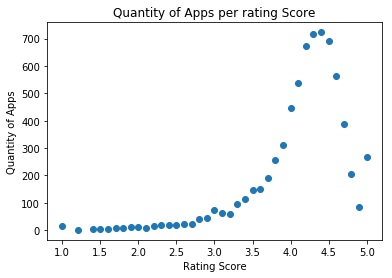

<Figure size 432x288 with 0 Axes>

In [74]:
ratingCount.plot(marker='o', linewidth=0)
plt.title("Quantity of Apps per rating Score")
plt.xlabel("Rating Score")
plt.ylabel("Quantity of Apps")
plt.show()
plt.savefig('AppsPerRating')

In [47]:
googleApps.describe()

,Rating,Reviews,Kilobytes,Installs,Price in Dollars
count,7026.000000,7.026000e+03,7026.000000,7.026000e+03,7026.000000
mean,4.160447,1.449556e+05,39434.121406,4.474559e+06,1.171890
std,0.559142,1.023960e+06,25120.007158,2.714500e+07,18.198351
min,1.000000,1.000000e+00,11.000000,1.000000e+00,0.000000
25%,4.000000,8.400000e+01,20000.000000,1.000000e+04,0.000000
50%,4.300000,1.545500e+03,33000.000000,1.000000e+05,0.000000
75%,4.500000,2.658325e+04,56000.000000,1.000000e+06,0.000000
max,5.000000,4.488145e+07,100000.000000,1.000000e+09,400.000000


In [48]:
# Find the averages for each category
categoryAverage = googleApps.groupby(['Category'], as_index=False).mean()
categoryAverage.head(10)

,Category,Rating,Reviews,Kilobytes,Installs,Price in Dollars
0,Art and Design,4.363158,18915.140351,38789.473684,1.723388e+06,0.104737
1,Auto and Vehicles,4.147619,15750.571429,39669.857143,6.947587e+05,0.000000
2,Beauty,4.291892,5020.243243,37891.891892,3.626000e+05,0.000000
3,Books and Reference,4.322695,23142.453901,39328.510638,8.140720e+05,0.148156
4,Business,4.094118,19013.466063,37175.493213,1.725262e+06,0.232670
5,Comics,4.158696,12810.586957,33218.543478,3.680674e+05,0.000000
6,Communication,4.076720,242971.079365,31360.444444,9.623892e+06,0.220794
7,Dating,3.963934,18009.909836,39377.049180,6.933804e+05,0.122787
8,Education,4.357333,40277.893333,34654.426667,1.296013e+06,0.106400
9,Entertainment,4.143396,127862.811321,37075.471698,9.065283e+06,0.056415


In [75]:
#Category with minimum average rating
catMinRating=categoryAverage.loc[categoryAverage['Rating'].idxmin()]
catMinRating

Category              Dating
Rating               3.96393
Reviews              18009.9
Kilobytes              39377
Installs              693380
Price in Dollars    0.122787
Name: 7, dtype: object

In [77]:
#Category with maximum average rating
catMaxRating=categoryAverage.loc[categoryAverage['Rating'].idxmax()]
catMaxRating

Category             Events
Rating              4.47895
Reviews             3321.61
Kilobytes           37903.5
Installs             280221
Price in Dollars          0
Name: 10, dtype: object

In [78]:
#Category with minimum average installs
catMinInstalls=categoryAverage.loc[categoryAverage['Installs'].idxmin()]
catMinInstalls

Category            Medical
Rating              4.16554
Reviews             4269.88
Kilobytes           35030.3
Installs             121948
Price in Dollars    2.14221
Name: 20, dtype: object

In [79]:
#Category with maximum average installs
catMaxInstalls=categoryAverage.loc[categoryAverage['Installs'].idxmax()]
catMaxInstalls

Category                   Game
Rating                  4.22848
Reviews                  440026
Kilobytes               47468.2
Installs            1.14084e+07
Price in Dollars        0.33755
Name: 14, dtype: object

In [84]:
# Find the total installs for each category
categoryCount = googleApps.groupby(['Category'], as_index=False).sum()
categoryCount.head(10)

,Category,Rating,Reviews,Kilobytes,Installs,Price in Dollars
0,Art and Design,248.7,1078163,2211000,98233100,5.97
1,Auto and Vehicles,261.3,992286,2499201,43769800,0.00
2,Beauty,158.8,185749,1402000,13416200,0.00
3,Books and Reference,609.5,3263086,5545320,114784155,20.89
4,Business,904.8,4201976,8215784,381282920,51.42
5,Comics,191.3,589287,1528053,16931100,0.00
6,Communication,770.5,45921534,5927124,1818915530,41.73
7,Dating,483.6,2197209,4804000,84592410,14.98
8,Education,326.8,3020842,2599082,97201000,7.98
9,Entertainment,219.6,6776729,1965000,480460000,2.99


In [49]:
# Minimums for each category
categoryMin = googleApps.groupby(['Category'], as_index=False).min()
categoryMin.head(10)

,Category,App,Rating,Reviews,Kilobytes,Installs,Type,Price in Dollars,Maturity,Updated
0,Art and Design,350 Diy Room Decor Ideas,3.2,1,10000,100,Free,0.0,Everyone,"April 15, 2018"
1,Auto and Vehicles,AE Garage,2.1,2,201,100,Free,0.0,Everyone,"April 21, 2018"
2,Beauty,AI Face Beauty Analysis - IntelliFace (Free),3.1,1,12000,100,Free,0.0,Everyone,"April 11, 2018"
3,Books and Reference,"10,000 Quotes DB (Premium)",2.7,2,93,5,Free,0.0,Everyone,"April 10, 2016"
4,Business,"104 Looking for a job - looking for a job, loo...",1.0,1,23,5,Free,0.0,Everyone,"April 11, 2017"
5,Comics,- Free Comics - Comic Apps,2.8,5,444,100,Free,0.0,Everyone,"August 1, 2018"
6,Communication,/u/app,1.0,1,17,10,Free,0.0,Everyone,"April 1, 2016"
7,Dating,"2Date Dating App, Love and matching",1.0,1,10000,10,Free,0.0,Everyone,"April 12, 2017"
8,Education,ABC Preschool Free,3.5,11,526,1000,Free,0.0,Everyone,"April 29, 2015"
9,Entertainment,AMC Theatres,3.0,303,11000,10000,Free,0.0,Everyone,"April 28, 2016"


In [82]:
# Maximums for each category
categoryMax = googleApps.groupby(['Category'], as_index=False).max()
categoryMax.head()

,Category,App,Rating,Reviews,Kilobytes,Installs,Type,Price in Dollars,Maturity,Updated
0,Art and Design,صور حرف H,5.0,224399,94000,50000000,Paid,1.99,Teen,"September 20, 2017"
1,Auto and Vehicles,m.ride - your motorcycle app,4.9,271920,97000,10000000,Free,0.00,Teen,"October 28, 2016"
2,Beauty,"ipsy: Makeup, Beauty, and Tips",4.9,49790,98000,5000000,Free,0.00,Teen,"October 18, 2017"
3,Books and Reference,日本AV历史,5.0,445756,98000,10000000,Paid,4.60,Teen,"September 29, 2017"
4,Business,sABN,5.0,1002859,99000,100000000,Paid,17.99,Teen,"September 6, 2017"


In [50]:
categoryMin['Installs'].min()

1

In [81]:
# Find the averages for each category
categoryMax = googleApps.groupby(['Category'], as_index=False).max()
categoryMax.head()

,Category,App,Rating,Reviews,Kilobytes,Installs,Type,Price in Dollars,Maturity,Updated
0,Art and Design,صور حرف H,5.0,224399,94000,50000000,Paid,1.99,Teen,"September 20, 2017"
1,Auto and Vehicles,m.ride - your motorcycle app,4.9,271920,97000,10000000,Free,0.00,Teen,"October 28, 2016"
2,Beauty,"ipsy: Makeup, Beauty, and Tips",4.9,49790,98000,5000000,Free,0.00,Teen,"October 18, 2017"
3,Books and Reference,日本AV历史,5.0,445756,98000,10000000,Paid,4.60,Teen,"September 29, 2017"
4,Business,sABN,5.0,1002859,99000,100000000,Paid,17.99,Teen,"September 6, 2017"


In [52]:
# Installs1 = round(googleApps.loc[googleApps["Category"] == "Art and Design"]["Rating"].mean(), 2)
Installs2 = round(googleApps.loc[googleApps["Category"] == "Auto and Vehicles"]["Rating"].min(), 2)
Installs2

2.1